In [1]:
import pandas as pd
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


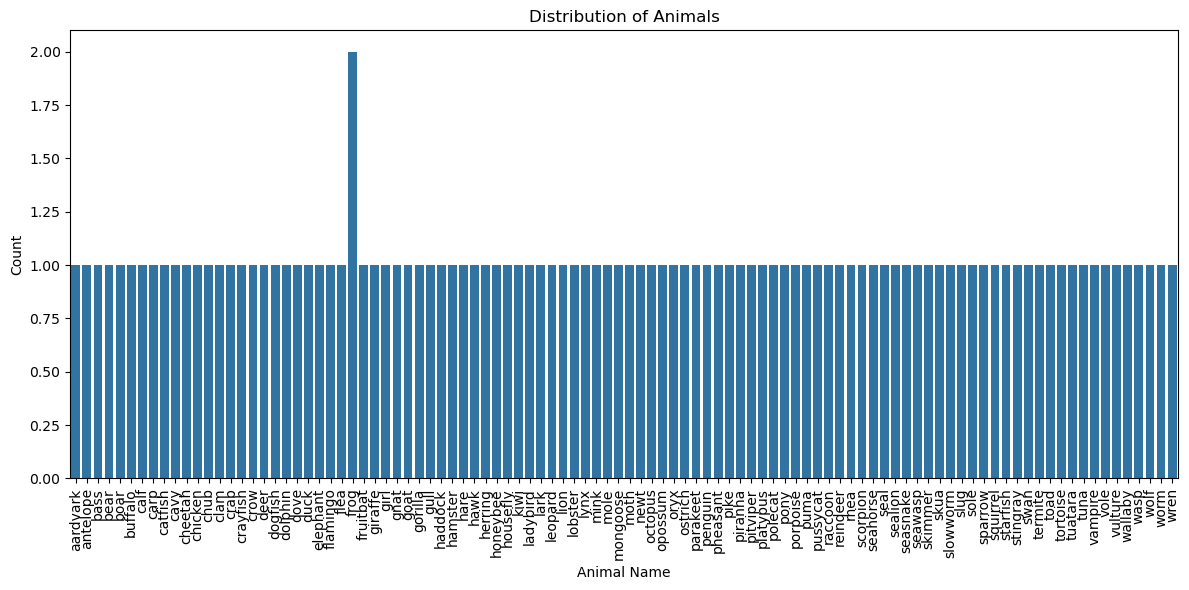

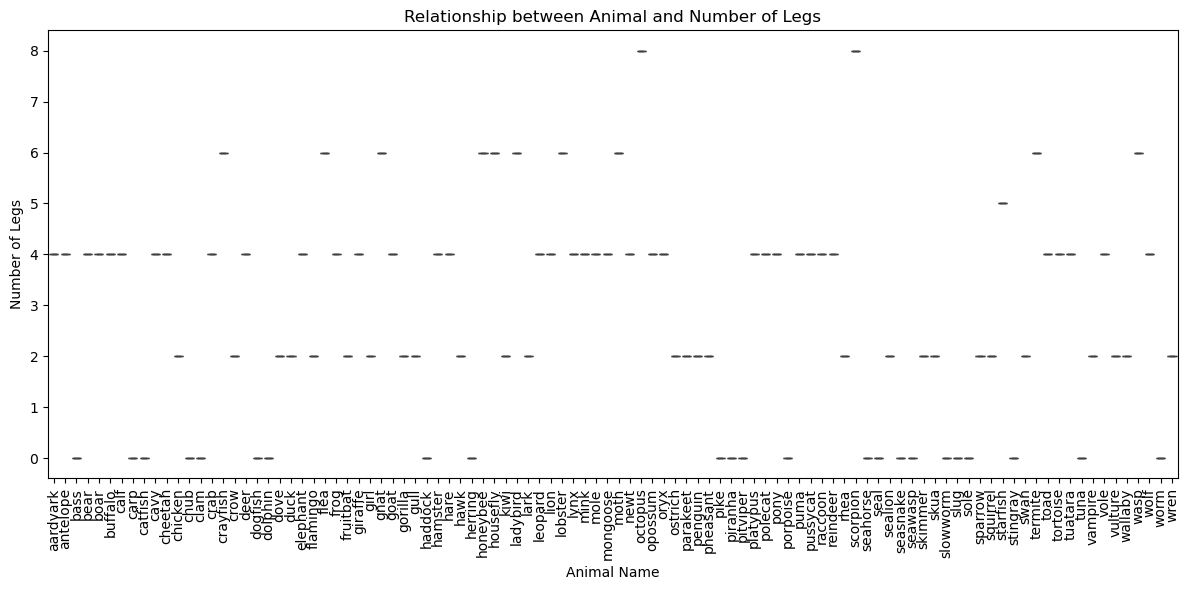

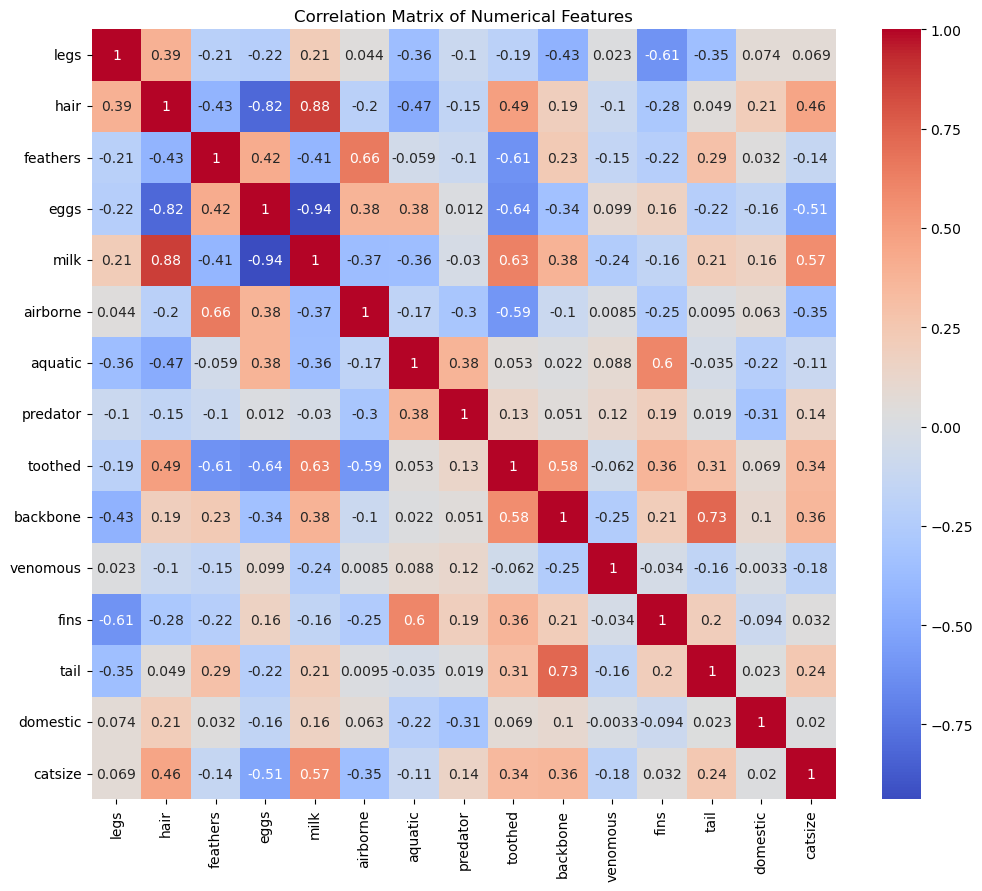

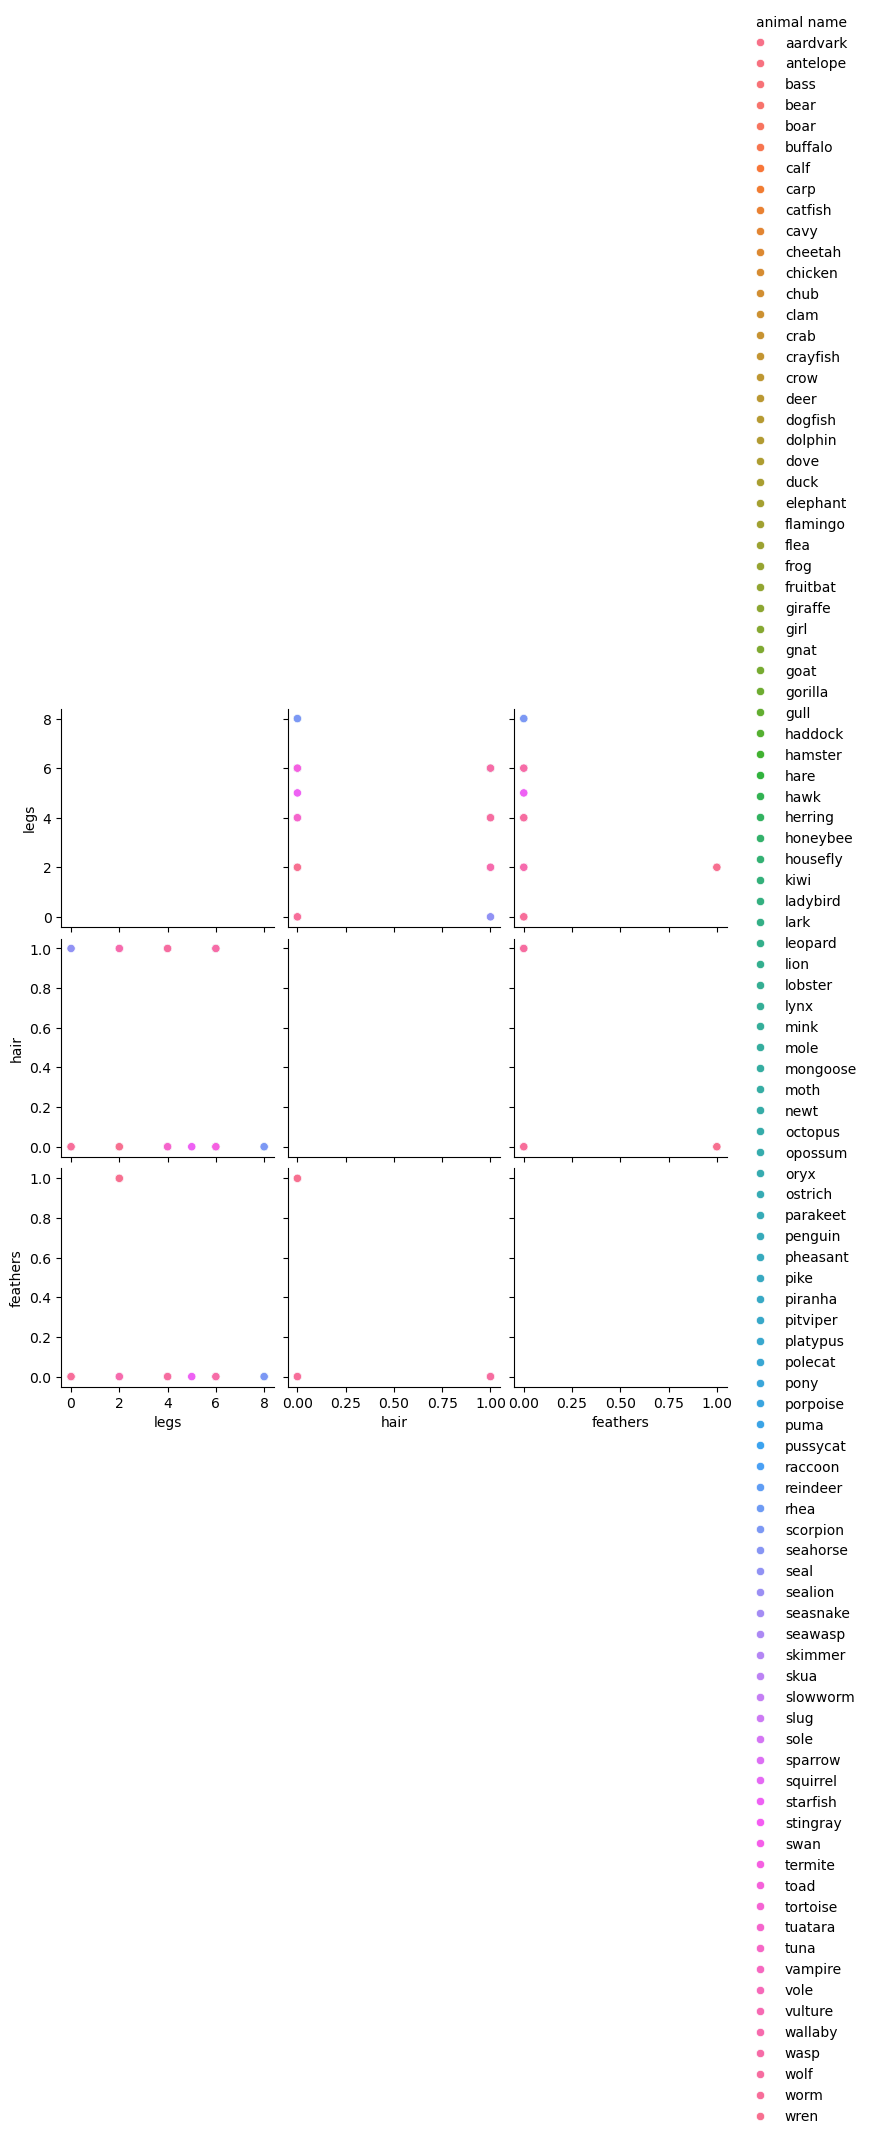

In [9]:
#Task1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Zoo.csv")

# 1. Distribution of animal names (you probably meant classes; adjust if needed)
plt.figure(figsize=(12, 6))
sns.countplot(x='animal name', data=df)
plt.title('Distribution of Animals')
plt.xlabel('Animal Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Relationship between animal name and number of legs
plt.figure(figsize=(12, 6))
sns.boxplot(x='animal name', y='legs', data=df)
plt.title('Relationship between Animal and Number of Legs')
plt.xlabel('Animal Name')
plt.ylabel('Number of Legs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Correlation matrix of numerical features
numerical_features = ['legs', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 
                      'aquatic', 'predator', 'toothed', 'backbone', 'venomous', 
                      'fins', 'tail', 'domestic', 'catsize']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Pairplot of selected numerical features
sns.pairplot(df, vars=['legs', 'hair', 'feathers'], hue='animal name')
plt.show()


In [11]:
# 2. Preprocess the data by handling missing values & Outliers, if any.

# Check for missing values
print(df.isnull().sum())



# Outlier detection and handling (Example: Using IQR for 'legs')
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['legs'] >= lower_bound) & (df['legs'] <= upper_bound)]




animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [13]:
#  3. Split the dataset into training and testing sets (80% training, 20% testing).

from sklearn.model_selection import train_test_split

# Assuming 'animal name' is your target variable
X = df.drop('animal name', axis=1)
y = df['animal name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

# Now i have X_train, X_test, y_train, and y_test for model training and evaluation.
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 79
Testing set size: 20


In [15]:
#  4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=3 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy}")


Accuracy of KNN classifier: 0.05


In [17]:
#5. Choose an appropriate distance metric and value for K.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# ... (Your existing code) ...

# Feature Scaling (Important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Experiment with different values of K and distance metrics
best_k = 1  # Initialize with a default value
best_metric = 'euclidean' # Initialize with a default metric
best_accuracy = 0

for k in range(1, 11):  # Try k values from 1 to 10
    for metric in ['euclidean', 'manhattan', 'minkowski']: # Experiment with different distance metrics
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_metric = metric

print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")
print(f"Best Accuracy: {best_accuracy}")

# Train the model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with best hyperparameters: {accuracy}")


Best K: 1
Best Metric: manhattan
Best Accuracy: 0.05
Accuracy of KNN classifier with best hyperparameters: 0.05


In [19]:
# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

from sklearn.metrics import precision_score, recall_score, f1_score


# Train the model with the best hyperparameters (or your chosen model)
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.05
Precision: 0.05
Recall: 0.05
F1-score: 0.05


C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


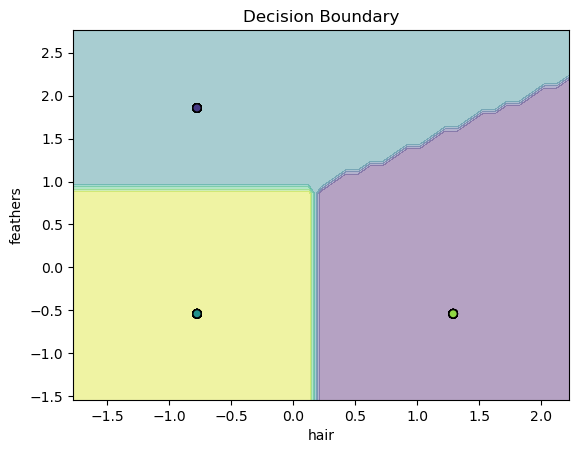

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

df = pd.read_csv("Zoo.csv")

# The 'class_type' column is not present in your data, 
# 'type' column likely contains the target variable.
# Replace 'class_type' with 'type'
X = df.drop(['animal name', 'type'], axis=1)  # Remove 'animal name' and 'type' columns
y = df['type']  # Use 'type' as the target variable


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', C=1) # You can experiment with different kernels and C values
svm.fit(X_train_scaled, y_train)


x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


X_grid = np.zeros((xx.ravel().shape[0], X_train_scaled.shape[1])) 
X_grid[:, 0] = xx.ravel()  # Replace first feature with xx
X_grid[:, 1] = yy.ravel()  # Replace second feature with yy

# Predict the class for each point in the meshgrid using the modified X_grid
Z = svm.predict(X_grid)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k')
plt.xlabel('hair')  # Replace with your chosen feature
plt.ylabel('feathers')  # Replace with your chosen feature
plt.title('Decision Boundary')
plt.show()